## 90 Percent Model Testing File

In this notebook, we load the saved 90 percent model and display its accuracy on the train and test datasets.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

Import the dataset we will be using:

In [2]:
songdata = pd.read_csv('data/genre_music_cleaned.csv')
songdata = songdata.sort_values(['track'])

Labelling of response variable and scaling of predictor variables.

In [3]:
from sklearn.preprocessing import LabelEncoder

# label encoding genre
songdata['genre'] = LabelEncoder().fit_transform(songdata['genre'])
songdata.head()

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s,time_signature,chorus_hit,sections,popularity,decade,genre
10557,"""""Cherry Cherry"""" from Hot August Night",Neil Diamond,0.341,0.9480,9,-5.081,1,0.1360,0.10100,0.00148,0.874,0.6320,171.578,443.320,4,53.79041,16,1,70s,5
4496,"""""Come, Sleep...""""",Louise Bogan,0.734,0.0694,3,-24.330,1,0.9170,0.61100,0.00000,0.106,0.3190,108.734,78.472,5,31.28651,4,0,60s,4
19258,"""""I'll Be Back"""" / Police Station & Escape",Brad Fiedel,0.201,0.3910,7,-16.067,1,0.0479,0.88900,0.86400,0.111,0.1810,59.801,226.310,4,38.29173,10,0,80s,5
34244,"""""Is This My Fate,"""" He Asked Them",Story Of The Year,0.254,0.9700,8,-4.635,1,0.0789,0.00015,0.00586,0.141,0.1660,99.963,300.520,4,55.19977,13,0,10s,5
13984,"""""Jerry"""" To The Rescue",Pino Donaggio,0.215,0.2420,0,-15.141,0,0.0398,0.58400,0.93600,0.146,0.0613,116.234,143.520,4,25.60898,9,0,70s,5


We now need to scale the predictor variables so that they can be used together to predict the genres.

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

songdata[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'tempo', 'time_signature', 'valence', 'mode', 'speechiness', 'chorus_hit', 'sections']] = MinMaxScaler().fit_transform(songdata[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'tempo', 'time_signature', 'valence', 'mode', 'speechiness', 'chorus_hit', 'sections']])

songdata.drop(columns=['popularity', 'track', 'artist', 'decade', 'time_signature', 'sections'], inplace=True)
songdata.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s,chorus_hit,genre
count,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000
mean,0.542633,0.575719,5.202605,0.734070,0.692941,0.076686,0.374916,0.161579,0.192288,0.544558,0.494928,234.697358,0.092719,2.757315
std,0.181162,0.254555,3.533002,0.101216,0.461281,0.091585,0.342635,0.309249,0.176256,0.270307,0.120988,123.102013,0.044200,1.301303
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.168000,0.000000,0.000000
25%,0.420040,0.389847,2.000000,0.684963,0.000000,0.035208,0.041466,0.000000,0.082353,0.329317,0.403620,170.667000,0.063628,2.000000
50%,0.554656,0.595899,5.000000,0.752495,1.000000,0.045417,0.277108,0.000145,0.120690,0.561245,0.487123,216.712000,0.082806,2.000000
75%,0.675101,0.784946,8.000000,0.806989,1.000000,0.073229,0.693775,0.080800,0.253550,0.773092,0.566713,266.840000,0.110258,3.000000
max,1.000000,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4170.227000,1.000000,5.000000


In [5]:
songdata['genre'].value_counts()

2    14329
3     9455
5     6190
1     2469
4     2104
0     1306
Name: genre, dtype: int64

We note that the numbers of each songs per category are different. For example, there are 14247 songs in the Pop genre, whereas there are only 1326 songs in the EDM genre. Although using a Train/Test model would help to obtain random sampling of data, as there is a huge difference in sample size between song categories, we run the risk of introducing a significant sampling bias. 

Hence, we use Stratified Sampling Technique, which would help to eliminate the biasness of the selection of data.

Source: https://medium.com/@IrekponorVictor/creating-an-unbiased-test-set-for-your-model-using-stratified-sampling-technique-672b778022d5

In [6]:
# importing StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit

#split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
# try out 10% test
split = StratifiedShuffleSplit(n_splits=1, test_size=0.1)

for train_index, test_index in split.split(songdata, songdata['genre']):
     train_set, test_set = songdata.iloc[train_index], songdata.iloc[test_index]

# after obtaining train/test set, proceed to split train into X and y train set, and test into x and y test set
y_train = pd.DataFrame(train_set['genre'])
x_train = train_set
x_train = x_train.drop(columns=['genre', 'chorus_hit'])

y_test = pd.DataFrame(test_set['genre'])
x_test = test_set
x_test = x_test.drop(columns=['genre', 'chorus_hit'])

Check how many songs in each genre there are in train/test set

In [7]:
x_train.value_counts()

danceability  energy    key  loudness  mode  speechiness  acousticness  instrumentalness  liveness  valence   tempo     duration_s
0.711538      0.825956  10   0.793894  0.0   0.035521     0.032329      0.006290          0.168357  0.948795  0.429710  285.373       3
0.456478      0.549887  1    0.775817  1.0   0.272917     0.010843      0.000000          0.061562  0.596386  0.331942  227.960       2
0.955466      0.510877  5    0.722550  0.0   0.167708     0.042169      0.001070          0.025254  0.845382  0.469053  203.787       2
0.697368      0.496874  2    0.658075  1.0   0.033229     0.264056      0.000006          0.207911  0.641566  0.473152  212.893       2
0.519231      0.025855  3    0.484933  0.0   0.057500     0.998996      0.882000          0.098377  0.399598  0.287666  169.482       2
                                                                                                                                     ..
0.470648      0.394848  9    0.815310  1.0   0.037083

In [8]:
x_test.value_counts()

danceability  energy    key  loudness  mode  speechiness  acousticness  instrumentalness  liveness  valence   tempo     duration_s
0.780364      0.694923  2    0.740872  1.0   0.065313     0.000110      0.675000          0.023225  0.599398  0.514487  375.484       2
0.443320      0.809952  10   0.770044  1.0   0.047604     0.456827      0.000002          0.322515  0.764056  0.610844  142.533       2
0.703441      0.700925  1    0.866879  1.0   0.058542     0.299197      0.001710          0.047566  0.934739  0.407918  430.120       2
0.063765      0.029256  2    0.444478  0.0   0.037604     0.979920      0.947000          0.096349  0.057430  0.279529  578.467       1
0.639676      0.351837  7    0.504104  1.0   0.079896     0.956827      0.753000          0.067444  0.614458  0.387890  19.533        1
                                                                                                                                     ..
0.477733      0.587897  0    0.771346  1.0   0.026458

In [9]:
y_train.value_counts()

genre
2        12896
3         8509
5         5571
1         2222
4         1894
0         1175
dtype: int64

In [10]:
y_test.value_counts()

genre
2        1433
3         946
5         619
1         247
4         210
0         131
dtype: int64

Now we load the saved model to predict the train and test datasets.

In [11]:
import pickle

filename = "models/90pct_model.sav"
classifier = pickle.load(open(filename, 'rb'))

D:\python\miniconda\envs\jupyter-env\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
D:\python\miniconda\envs\jupyter-env\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator MLPClassifier from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [12]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [17]:
y_pred = classifier.predict(x_train.values)

#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(y_pred, y_train)

#Printing the accuracy
print("Accuracy of MLPClassifier : ", accuracy(cm))

Accuracy of MLPClassifier :  0.9095360585117922


Try plotting the correlation matrix.

<AxesSubplot:>

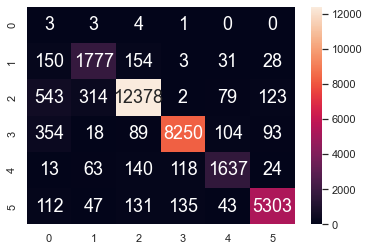

In [18]:
sb.heatmap(cm, annot=True, fmt=".0f", annot_kws={"size":18})

Check the accuracy on the test data.

In [19]:
y_test_pred = classifier.predict(x_test.values)

cm = confusion_matrix(y_test_pred, y_test)

# print accuracy
print('Accuracy of MLPClassifier on test data :', accuracy(cm))

Accuracy of MLPClassifier on test data : 0.9107640825432236


<AxesSubplot:>

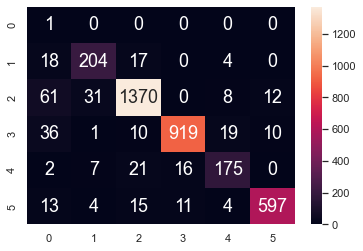

In [20]:
sb.heatmap(cm, annot=True, fmt=".0f", annot_kws={"size":18})

The model is much more accurate compared to the initial model, and it is now able to predict the various genres much more accurately. However, the model is still not the best as it is still incorrectly predicting the genre of many songs. This suggests that the predictor variables the model has been trained on is not unique enough to differentiate clearly between the genres. Further exploration of the music characteristics of the overlapping genres is needed, and this is done in the notebook "EDA - Characteristics of Genre".